# Causal Lasso for your data

In [10]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from causal_lasso.solver import CLSolver
from graph_tools.metrics import compare_graphs

/Users/manonromain/anaconda3/lib/python3.7/site-packages/causal_lasso/general_weights_algo.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [31]:
X = np.random.random((200, 50))     # Your data here in format (n_samples, n_features)
names = [str(i) for i in range(50)] # Names of your features (optional)
m, n = X.shape

Next we execute our algorithm:

In [38]:
alg = CLSolver(version="gen", dagness_exp=0.3/n, dagness_pen=1e-1, l1_pen=1e-8, eps=1e-7, max_iter=100,
                logging=True, mosek=True)
Wk = alg.fit(X)

Done in 99.37424731254578 s and 100 iterations


Now we create the corresponding graph and display it

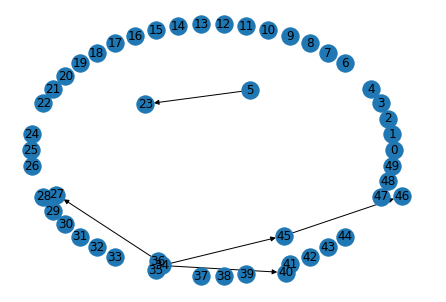

In [39]:
G = nx.DiGraph(Wk)
mapping_names = {i: names[i] for i in range(n)}
G = nx.relabel_nodes(G, mapping_names)
nx.draw_kamada_kawai(G, with_labels=True)

#### Convert to cytospace

The beautiful graphs in our paper were created using Cytoscape. Just run this cell and upload the file to cytoscape. 

First download the software [here](https://cytoscape.org/), and upload the json file using "Import Network from File System" in the menu bar (icon is an arrow and a graph). We recommend using "yFiles Hierarchical Layout" but feel free to use a layout of your choising. 

In [40]:
import json
cyto_data = nx.readwrite.json_graph.cytoscape.cytoscape_data(G)
with open("cytoscape_output.json", "wt") as f:
    json.dump(cyto_data, f)

## Additional visualisations

#### Convergence of different parts of the objective

In [41]:
logging = alg.log_dict

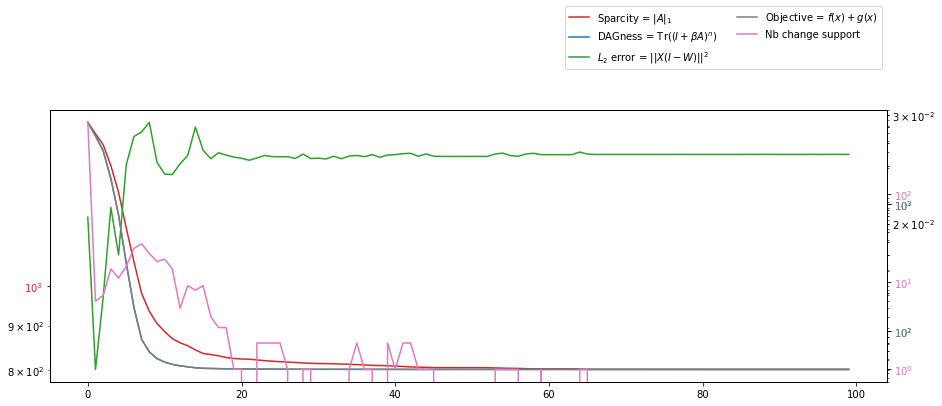

In [42]:
values_likelihood = logging["l2_error"]
values_l1pen = logging["l1_val"] 
values_dagness = logging["dag_constraint"]
values_obj = values_likelihood + logging["dagness_pen"] * values_dagness + logging["l1_pen"] * values_l1pen
logging["obj"] = values_obj
values_change_support = logging["nb_change_support"]

fig, ax1 = plt.subplots(figsize=(15,5))

color = 'tab:red'
l1 = ax1.plot(values_l1pen, label = "Sparcity = $\|A\|_1$", color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_yscale("log")

ax2 = ax1.twinx()  

color = 'tab:blue'
l2 = ax2.plot(values_dagness, label="DAGness = $\mathrm{Tr}((I+\\beta A)^n)$", color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_yscale("log")

ax3 = ax1.twinx()  
color = 'tab:green'
l3 = ax3.plot(values_likelihood, color=color, label='$L_2$ error = $||X(I-W)||^2$')#-2\log\det(D-A)$')
ax3.tick_params(axis='y', labelcolor=color)
ax3.set_yscale("log")

ax4 = ax1.twinx()
color = 'tab:grey'
l4 = ax4.plot(values_obj, color=color, label='Objective = $f(x)+g(x)$')
ax4.tick_params(axis='y', labelcolor=color)
ax4.set_yscale("log")

ax5 = ax1.twinx()
color = 'tab:pink'
l5 = ax5.plot(values_change_support, color=color, label='Nb change support')
ax5.tick_params(axis='y', labelcolor=color)
ax5.set_yscale("log")

lines = l1 + l2 + l3 + l4 + l5
labs = [l.get_label() for l in lines]
ax1.legend(lines, labs, ncol=2,  bbox_to_anchor=(1, 1.4))

#plt.xlim([10, 30])

Have fun!

Any questions? Contact manon.romain@ens.fr